データ理解

In [2]:
classes = {
    0 : "L",
    1 : "O",
    2 : "V",
    3 : "E"
}
classes

{0: 'L', 1: 'O', 2: 'V', 3: 'E'}

In [6]:
import torch
X = torch.Tensor(
    [
     [
      [1, 0, 0, 0, 0],
      [1, 0, 0, 0, 0],
      [1, 0, 0, 0, 0],
      [1, 0, 0, 0, 0],
      [1, 1, 1, 1, 1]
      ],
     [
      [1, 1, 1, 1, 1],
      [1, 0, 0, 0, 1],
      [1, 0, 0, 0, 1],
      [1, 0, 0, 0, 1],
      [1, 1, 1, 1, 1]
      ],
     [
      [1, 0, 0, 0, 1],
      [1, 0, 0, 0, 1],
      [1, 0, 0, 0, 1],
      [0, 1, 1, 1, 0],
      [0, 0, 1, 0, 0]
      ],
     [
      [1, 1, 1, 1, 1],
      [1, 0, 0, 0, 0],
      [1, 1, 1, 1, 1],
      [1, 0, 0, 0, 0],
      [1, 1, 1, 1, 1]
      ]    
    ]
)

In [7]:
X.shape

torch.Size([4, 5, 5])

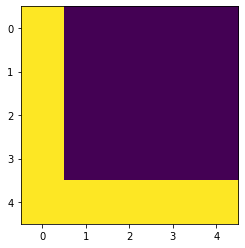

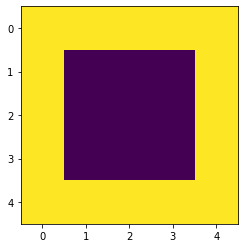

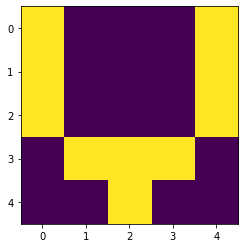

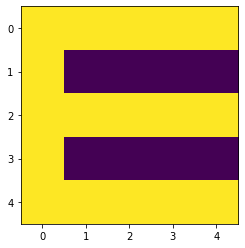

In [8]:
import matplotlib.pyplot as plt

for i in range(4):
  plt.imshow(X[i])
  plt.show()

In [25]:
y = torch.Tensor([0, 1, 2, 3]).long()

In [13]:
for i in range(4):
  print(classes[y[i].item()])

L
O
V
E


モデル構築

In [15]:
import torch.nn as nn
import torch.nn.functional as F

class Dense(nn.Module):
  def __init__(self):
    super().__init__() #親クラスの初期化
    self.fc1 = nn.Linear(25, 32)
    self.fc2 = nn.Linear(32, 32)
    self.fc3 = nn.Linear(32, 4)
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [16]:
net = Dense()

In [18]:
net.forward(X.view(-1, 25))

tensor([[ 0.0003,  0.1967, -0.0102, -0.1191],
        [-0.0016,  0.1975,  0.0026, -0.0866],
        [-0.0598,  0.1443,  0.0209, -0.0755],
        [-0.0028,  0.2086,  0.0400, -0.1080]], grad_fn=<AddmmBackward>)

ハイパーパラメータ設定

In [20]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)
epochs = 100

訓練

In [26]:
losses = []
for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = net.forward(X.view(-1, 5 * 5))
  loss = loss_fn(outputs, y)
  loss.backward()
  optimizer.step()
  losses.append(loss)

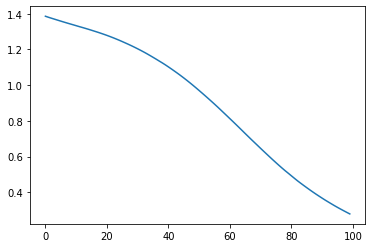

In [27]:
plt.plot(losses)

推論

In [37]:
l = torch.Tensor(
    [
     [1, 0, 0, 0, 0],
     [1, 0, 0, 0, 0],
     [1, 1, 0, 0, 0],
     [1, 1, 0, 0, 0],
     [1, 1, 1, 1, 1]
     ]
)

In [38]:
l.shape

torch.Size([5, 5])

In [39]:
classes[net.forward(l.view(-1, 25)).max(dim = 1)[1].item()]

'L'

In [43]:
o = torch.Tensor(
    [
     [1, 1, 1, 1, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 0, 1],
     [1, 0, 0, 1, 1],
     [1, 1, 1, 1, 1]
     ]
)

In [44]:
o.shape

torch.Size([5, 5])

In [45]:
classes[net.forward(o.view(-1, 25)).max(dim = 1)[1].item()]

'O'